# Logistic Regression pada Binary Classification Task


#### Formula Dasar
<img src="logistic.png" style="width:350px">
<img src="logistic2.png" style="width:350px">
Rentang nilai sumbu y hanya akan ada 0 sampai 1. Pada classification task label akan di encoding menjadi nilai 0 dan 1, jadi jika graik mendekati satu maka akan diklasifikasikan sebagai kelas 1 dan sebaliknya.

### Dataset: SMS Spam Collection 
Tujuan: mengklasifikasikan apakah suatu sms diklasifikasikan sebagai spam atau ham

In [7]:
# menyiapkan dataset
import pandas as pd

df = pd.read_csv('SMSSpamCollection',
                sep='\t',
                header=None,
                names=['label', 'sms'])

df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# mengitung berapa banyak data ham dan data spam
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Training dan Testing Dataset

In [30]:
from sklearn.preprocessing import LabelBinarizer

x = df['sms'].values # expalanatory variabel
y = df['label'].values # response variabel

# konversi label ham dan spam
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel() # mengubah ke dalam bentuk array 1D

lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [36]:
# memisahkan data menjadi train dan testing dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=.25,
                                                    random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(f"\n {x_train}\n")
print(y_train)

(4179,)
(4179,)
(1393,)
(1393,)

 ['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear']

[0 1 0 ... 1 0 0]


### Feature Extraction dengan TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ekstraksi dengan tf-idf
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print(x_train_tfidf)

  (0, 6903)	0.3591386422223876
  (0, 2006)	0.2898082580285881
  (0, 900)	0.4114867709157148
  (0, 6739)	0.3546359942830148
  (0, 2554)	0.3825278811525034
  (0, 3926)	0.3126721340000456
  (0, 4453)	0.2297719954323795
  (0, 5123)	0.308974289326673
  (0, 3007)	0.21421364306658514
  (0, 2997)	0.23173982975834367
  (1, 36)	0.28902673040368515
  (1, 1548)	0.18167737976542422
  (1, 2003)	0.2711077935907125
  (1, 5301)	0.2711077935907125
  (1, 4358)	0.17341410292348694
  (1, 532)	0.20186022353306565
  (1, 6131)	0.16142609035094446
  (1, 5394)	0.16464655071448758
  (1, 4677)	0.24039776602646504
  (1, 216)	0.28902673040368515
  (1, 6013)	0.20089911182610476
  (1, 6472)	0.24039776602646504
  (1, 5441)	0.5009783758205715
  (1, 799)	0.25048918791028574
  (1, 5642)	0.24344998442301355
  :	:
  (4176, 343)	0.2811068572055718
  (4176, 107)	0.29968668460649284
  (4176, 2004)	0.25589560236817055
  (4176, 4350)	0.29968668460649284
  (4176, 637)	0.29968668460649284
  (4176, 7114)	0.4512018097459442
  (4176

### Binary Classification dengan Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)

for pred,sms in zip(y_pred[:5], x_test[:5]):
    print(f"PRED: {pred} - SMS: {sms}")

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@
PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.
PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
PRED: 0 - SMS: Sir Goodmorning, Once free call me.
PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..


### Evaluasi Metrics pada Binary Classification
##### Terminologi Dasar
<ul>
    <li>True Positif (TP) ex: spam sebagai spam</li>
    <li>True Negatif (TN) ex: ham sebagai bukan spam</li>
    <li>False Positif (FP) ex: ham sebagai spam</li>
    <li>False Negatif (FN) ex: ham sebagai bukan ham</li>
</ul>

#### 1. Confusion Matrix
Confusion matrix adalah sebuah tabel yang sering digunakan untuk mengukur kinerja dari model klasifikasi di machine learning. Tabel ini menggambarkan lebih detail tentang jumlah data yang diklasifikasikan dengan benar maupun salah. Dikenal juga sebagai error matrix. <br>
<img src='https://www.justintodata.com/wp-content/uploads/2020/07/image.png'>

In [47]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [51]:
# ekstraksi nilai dari conusion matrix
# urutan jangan sampai keliru
tn, fp, fn, tp = matrix.ravel() # diubah ke array 1D
 
print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")
print(f"TP: {tp}")

TN: 1207
FP: 1
FN: 48
TP: 137


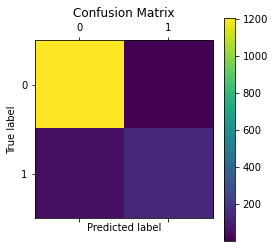

In [54]:
# Visualisasi 
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

###### Catatan 
0 = ham <br>
1 = spam <br>
kuning = TN <br> 
ungu muda = TP <br>
ungu tua atas = FP <br>
ungu tua bawah = FN 

#### 2. Accuracy
Mengukur porsi dari hasil prediksi yang tepat.
<img src="accuracy.png">

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 96.48%


#### 3. Precission & Recall
<strong>Precision</strong> adalah tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang diberikan oleh sistem. <br>
<strong>Recall</strong> adalah tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.
<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" style="width:350px">
##### Precission or Positive Value (PPV) 
<img src="https://dataq.files.wordpress.com/2013/06/rumus.png" style="width:350px">

In [62]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.2%}")

Precision: 99.28%


##### Recall of True Positive Rate (TPR) or Sensitivity

In [64]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

print(f"Recall: {recall:.2%}")

Recall: 74.05%


#### 4. F1-Score
F1-meassure adalah harmonic mean dari precission dan recall.
<img src="f1-score.png">

In [66]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1:.2%}")

F1-Score: 84.83%


#### 5. ROC: Receiver Operating Characteristic
ROC menawarkan visualisasi terhadap performa dari classifier dengan membandingkan nilai Recall (TPR) dan nilai Fallout (FPR).
<img src="fallout.png">
<img src="roc.png" style="width:350px">

###### Catatan 
auc = area under the curve atau area yang berada di bawah garis warna biru.

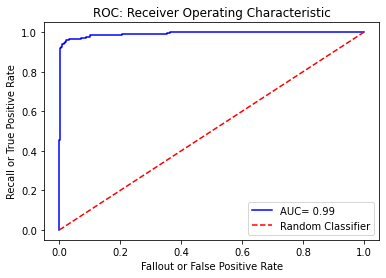

In [77]:
from sklearn.metrics import roc_curve, auc

# proses kalkulasi
prob_estimates = model.predict_proba(x_test_tfidf)

fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

# proses visualisasi
plt.plot(fpr, tpr, 'b', label=f'AUC= {nilai_auc:.2}')
plt.plot([0,1], [0,1], 'r--', label="Random Classifier")

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')

plt.legend()

plt.show()